In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')
data_new = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/Lesson_5/transaction_data_updated.csv')

In [3]:
#проверить кол-во пропущенных значений
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

,status,transaction_count
0,successfull,3692
1,cancelled,1619
2,error,4


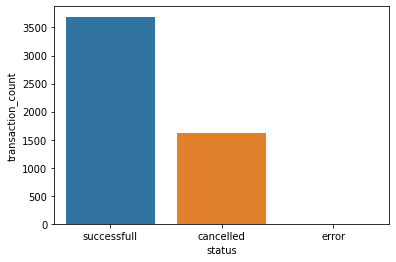

In [4]:
#распределение транзакций по статусу

transactions = pd.DataFrame(data=data['transaction'].value_counts()).reset_index()
transactions = transactions.rename(columns={'index': 'status', 'transaction': 'transaction_count'})
sns.barplot(x='status', y='transaction_count', data = transactions)
transactions

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,transactions_count
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


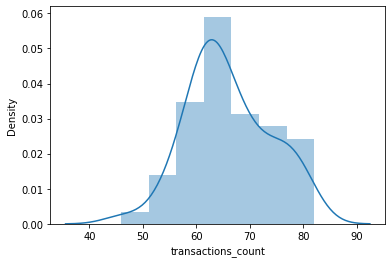

In [5]:
#посмотреть числовые характеристики распределнения кол-во транзакций по пользователям

transactions_by_user = data.query('transaction == "successfull"') \
                        .groupby(by='name', as_index=False) \
                        .agg({'date': 'count'}) \
                        .rename(columns={'date': 'transactions_count'}) \
                        .sort_values(by='transactions_count', ascending=False)
sns.distplot(transactions_by_user["transactions_count"])
transactions_by_user.describe()

In [6]:
data_new

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [7]:
#построить сводную таблицу из сгруппированной таблицы обновленного дф
users_vs_minute = data_new.groupby(by=['name', 'minute'], as_index=False) \
                            .agg({'transaction': 'count'})

user_vs_minute_pivot = pd.pivot_table(users_vs_minute, index='minute', columns='name', values='transaction') \
                        .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


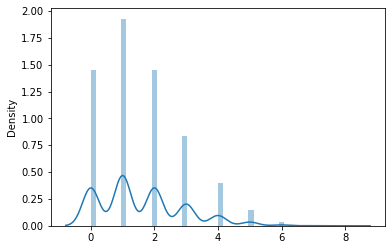

In [8]:
sns.distplot(user_vs_minute_pivot)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


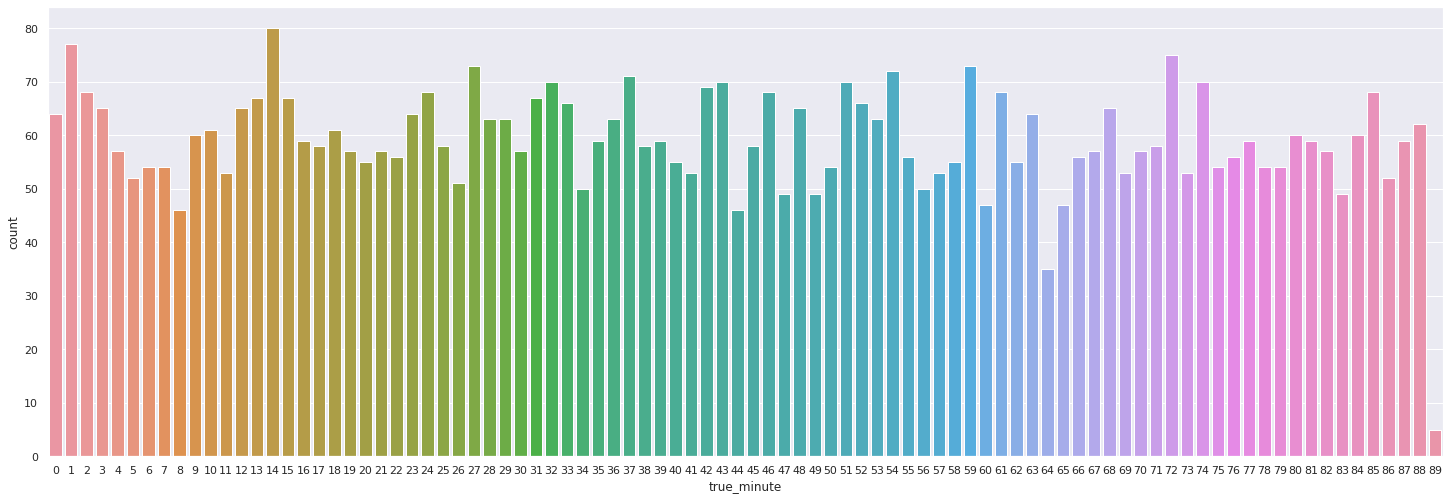

In [10]:
#вывести кол-во минут прошеших с начала дня

data_new['date'] = pd.to_datetime(data_new['date'])
data_new['true_minute'] = (pd.to_timedelta(data_new['date'].dt.time.astype(str)).dt.total_seconds() / 60).astype(int)

sns.set(rc={'figure.figsize':(25,8.27)}) #устанавливаем размер графика
sns.countplot(data_new['true_minute'])
data_new.head()